### Task 3: Predicting Expected Loss
#### Data Exploring

In [45]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('Loan_Data.csv')
print(data.isna().sum())
print(data.head())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64
   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347

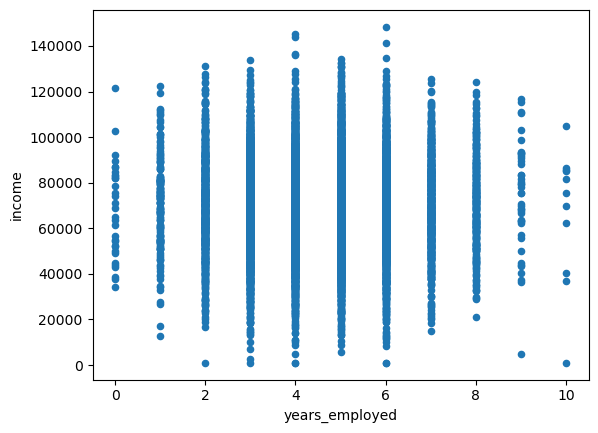

In [11]:
data.plot(kind='scatter',x='years_employed', y='income')
plt.show()

From the figure above, there is no significant trend between years of employed and income.

#### Modeling

In [21]:
# Seperate independent and dependent variables
X = data[['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
y = data['default']

print(X.describe(), y.describe())

       credit_lines_outstanding  loan_amt_outstanding  total_debt_outstanding  \
count              10000.000000          10000.000000            10000.000000   
mean                   1.461200           4159.677034             8718.916797   
std                    1.743846           1421.399078             6627.164762   
min                    0.000000             46.783973               31.652732   
25%                    0.000000           3154.235371             4199.836020   
50%                    1.000000           4052.377228             6732.407217   
75%                    2.000000           5052.898103            11272.263740   
max                    5.000000          10750.677810            43688.784100   

              income  years_employed    fico_score  
count   10000.000000    10000.000000  10000.000000  
mean    70039.901401        4.552800    637.557700  
std     20072.214143        1.566862     60.657906  
min      1000.000000        0.000000    408.000000  
25%  

From the X and y varibles, the data varies across different features. Thus, implementing standard scaler to X_train and y_train, and transform X_test and y_test

In [24]:
# Split for train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1111)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### Logistic Regression for Classification

In [40]:
# Instantiate Logistic Regression Model for Classification and fit the model
logit = LogisticRegression().fit(X_train, y_train)
# Predict the value
y_pred_logit = logit.predict(X_test)
# Predict the probability
y_pred_proba_logit = logit.predict_proba(X_test)[:,1]
# Calculate the RAROC value and f1 for the model
logit_score = roc_auc_score(y_test, y_pred_proba_logit)
print(logit_score)
logit_f1 = f1_score(y_test, y_pred_logit)
print(logit_f1)

0.9999985261334955
0.997289972899729


##### Decision Tree Classifier

In [47]:
# Instantiate Decision Tree Model for Classification and fit the model
dt = DecisionTreeClassifier().fit(X_train, y_train)
# Predict the value
y_pred_dt = dt.predict(X_test)
# Predict the probability
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]
# Calculate the RAROC value and f1 for the model
dt_score = roc_auc_score(y_test, y_pred_proba_dt)
print(dt_score)
dt_f1 = f1_score(y_test, y_pred_dt)
print(dt_f1)

0.992262200851158
0.9873873873873874


##### Random Forest Classifier

In [46]:
# Instantiate Random Forest Model for Classification and fit the model
rfc = RandomForestClassifier().fit(X_train, y_train)
# Predict the value
y_pred_rfc = rfc.predict(X_test)
# Predict the probability
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
# Calculate the RAROC value and f1 for the model
rfc_score = roc_auc_score(y_test, y_pred_proba_rfc)
print(rfc_score)
rfc_f1 = f1_score(y_test, y_pred_rfc)
print(rfc_f1)

0.9998548241493027
0.9854545454545456


From the f1 and RAROC scores above among three different models, logistic regression model performs the best. Thus, using logistic regression result to build the expected loss function.

#### Function Modeling

In [51]:
# Define varibles for EL
ead = data['loan_amt_outstanding']
rr = 0.1
lgd = 1 - rr
pd = np.append(logit.predict_proba(X_train)[:,1], logit.predict_proba(X_test)[:,1])

def exp_loss(lgd, ead, pd):
    el = lgd * ead * pd
    return el

print(exp_loss(lgd, ead, pd))

0       1.401026e-04
1       2.648834e-04
2       3.026703e+03
3       4.288196e+03
4       2.645069e-05
            ...     
9995    1.228229e-08
9996    1.667216e-08
9997    1.430634e-05
9998    4.682308e-07
9999    2.530566e-05
Name: loan_amt_outstanding, Length: 10000, dtype: float64
